<a href="https://colab.research.google.com/github/santaj91/Project3/blob/main/N421a_Count_based_Representation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *AIB / SECTION 4 / SPRINT 2 / NOTE 1*

# 📝 Assignment

---


# Count-based_Representation

indeed.com 에서 Data Scientist 키워드로 Job descrition을 찾아 스크래핑한 데이터를 이용해 과제를 진행해 보겠습니다.

[Data_Scienties.csv](https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/indeed/Data_Scientist.csv) 파일에는 1300여개의 Data Scientist job description 정보가 담겨 있습니다.

## 1. 데이터 전처리 (Text preprocessing)

In [1]:
import re
import string

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 0) 텍스트 분석에 앞서 데이터 전처리를 진행합니다.

- 파일을 불러온 후 title, company, description 에 해당하는 Column만 남겨주세요.
- 중복값을 제거하세요.

In [2]:
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/indeed/Data_Scientist.csv')

df=df[['title','company','description']]

df=df.drop_duplicates(keep='last',subset=['description'])

In [3]:
df.shape

(757, 3)

### 1) 토큰을 정제합니다.

- 문자를 소문자로 통일
- 분석에 관련 없는 정보 제거
- 이번 과제는 `spacy` 로부터 `"en_core_web_sm"` 을 로드하여 진행해주세요.

- **문항 1) 대문자를 소문자로 변경하는 함수를 입력하세요.**
- **문항 2) 정규 표현식을 사용하여 re 라이브러리에서 알파벳 소문자, 숫자만 받을 수 있는 코드를 작성하세요.**

In [4]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_sm")
tokenizer = Tokenizer(nlp.vocab)

In [5]:
import re

def lower_and_regex(sentence):

    
    sentence=re.sub(r"[^a-zA-Z0-9 ]","",sentence)
    sentence = sentence.lower().split()
    
    return sentence


In [6]:
df['tokens']=df.description.apply(lower_and_regex)

In [7]:
df

,title,company,description,tokens
1,Data Scientist (Structured Products),EquiTrust Life Insurance Company,Job Details\nDescription\nEssential Duties and...,"[job, detailsdescriptionessential, duties, and..."
3,"Specialist, Data Science",Nationwide,As a team member in the Finance and Internal A...,"[as, a, team, member, in, the, finance, and, i..."
4,Sr. Data Scientist (Remote),American Credit Acceptance,Overview:\nAmerican Credit Acceptance seeks a ...,"[overviewamerican, credit, acceptance, seeks, ..."
5,Data Scientist Associate Sr (DADS06) BTB - LEG...,"JPMorgan Chase Bank, N.A.",J.P. Morgan's Corporate & Investment Bank (CIB...,"[jp, morgans, corporate, investment, bank, cib..."
6,Data Scientist,VyStar Credit Union,"At VyStar, we offer competitive pay, an excell...","[at, vystar, we, offer, competitive, pay, an, ..."
...,...,...,...,...
1295,Senior Data & Applied Scientist,Microsoft,Senior Data & Applied Scientist\nDo you have a...,"[senior, data, applied, scientistdo, you, have..."
1296,Senior Data Scientist,Takeda Pharmaceuticals,Job Description\nOBJECTIVES:\nEffectively work...,"[job, descriptionobjectiveseffectively, workin..."
1297,Senior Data Scientist,eBay Inc.,eBay is a global commerce leader that allows y...,"[ebay, is, a, global, commerce, leader, that, ..."
1298,Senior Data Scientist,Cox Automotive,"Cox Automotive, a subsidiary of Cox Enterprise...","[cox, automotive, a, subsidiary, of, cox, ente..."


### 2) 정제한 토큰을 시각화 합니다.

- Top 10 토큰을 프린트 합니다.
- 토큰의 수, 빈도 순위, 존재 문서 수, 비율 등 정보를 계산합니다.
- 토큰 순위에 따른 퍼센트 누적 분포 그래프를 시각화합니다.

- **문항 3) 추천 토큰 순위 10개 단어를 입력하세요.**

In [8]:
### 이곳에서 과제를 진행해 주세요 ### 
from collections import Counter

word_counts = Counter()

df['tokens'].apply(lambda x: word_counts.update(x))

word_counts.most_common(10)

[('and', 21790),
 ('to', 12578),
 ('the', 9962),
 ('of', 8820),
 ('data', 7047),
 ('in', 6679),
 ('a', 6223),
 ('with', 5674),
 ('for', 4044),
 ('or', 3779)]

In [9]:
def word_count(docs):

    word_counts=Counter()# 말뭉치 단어 개수

    word_in_docs= Counter()# 단어 존재하는 문서의 빈도

    total_docs=len(docs)

    for doc in docs:
        word_counts.update(doc)
        word_in_docs.update(set(doc))# set 중복을 허용하지 않는다. 순서가 없다(Unordered).

    temp = zip(word_counts.keys(),word_counts.values())

    wc=pd.DataFrame(temp,columns=['word','count'])

    wc['rank']=wc['count'].rank(method='first',ascending=False).astype(int)
    total = wc['count'].sum()

    wc['percent']=wc['count'].apply(lambda x: x/total)

    wc = wc.sort_values(by='rank')# 누적합 전에 정렬

    wc['cul_percent']=wc['percent'].cumsum() # 누적합


    temp2=zip(word_in_docs.keys(),word_in_docs.values())
    ac= pd.DataFrame(temp2,columns=['word','word_in_docs'])
    wc=ac.merge(wc,on='word')

    wc['word_in_docs_percent']=wc['word_in_docs'].apply(lambda x:x/total_docs)

    return wc.sort_values(by='rank')

In [10]:
wc=word_count(df.tokens)

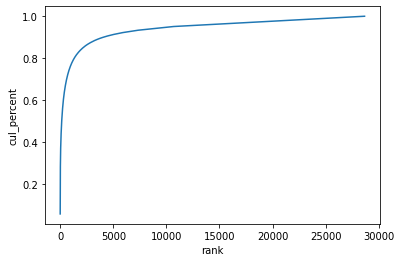

In [11]:
import seaborn as sns

sns.lineplot(x='rank',y='cul_percent',data=wc)

### 4) 확장된 불용어 사전을 사용해 토큰을 정제합니다.


- **문항 4) 기본 불용어 사전에 두 단어(`"data", "work"`)를 추가하는 코드를 사용해주세요.**
- **문항 5) 불용어를 제거하고 난 뒤 토큰 순위 10개의 단어를 입력하세요.**

In [12]:
### 이곳에서 과제를 진행해 주세요 ### 

STOP_WORDS= nlp.Defaults.stop_words.union(['data','work'])

In [13]:
import re

def regex(sentence):

    
    sentence=re.sub(r"[^a-zA-Z0-9 ]","",sentence)
    
    return sentence

In [14]:
tokens= []


for doc in tokenizer.pipe(df['description'].apply(regex)):
    doc_tokens=[]
 
    for token in doc:
        
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
            
    tokens.append(doc_tokens)

df['tokens']= tokens


In [15]:
df

,title,company,description,tokens
1,Data Scientist (Structured Products),EquiTrust Life Insurance Company,Job Details\nDescription\nEssential Duties and...,"[job, detailsdescriptionessential, duties, res..."
3,"Specialist, Data Science",Nationwide,As a team member in the Finance and Internal A...,"[team, member, finance, internal, audit, depar..."
4,Sr. Data Scientist (Remote),American Credit Acceptance,Overview:\nAmerican Credit Acceptance seeks a ...,"[overviewamerican, credit, acceptance, seeks, ..."
5,Data Scientist Associate Sr (DADS06) BTB - LEG...,"JPMorgan Chase Bank, N.A.",J.P. Morgan's Corporate & Investment Bank (CIB...,"[jp, morgans, corporate, , investment, bank, ..."
6,Data Scientist,VyStar Credit Union,"At VyStar, we offer competitive pay, an excell...","[vystar, offer, competitive, pay, excellent, b..."
...,...,...,...,...
1295,Senior Data & Applied Scientist,Microsoft,Senior Data & Applied Scientist\nDo you have a...,"[senior, , applied, scientistdo, passion, mac..."
1296,Senior Data Scientist,Takeda Pharmaceuticals,Job Description\nOBJECTIVES:\nEffectively work...,"[job, descriptionobjectiveseffectively, workin..."
1297,Senior Data Scientist,eBay Inc.,eBay is a global commerce leader that allows y...,"[ebay, global, commerce, leader, allows, shape..."
1298,Senior Data Scientist,Cox Automotive,"Cox Automotive, a subsidiary of Cox Enterprise...","[cox, automotive, subsidiary, cox, enterprises..."


In [16]:
wc=word_count(df['tokens'])

wc_top10 =wc[wc['rank']<=10]

wc_top10

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
65,experience,641,2004,1,0.008809,0.008809,0.846764
513,business,527,1968,2,0.008651,0.017459,0.696169
117,,508,1592,3,0.006998,0.024457,0.671070
111,science,603,1578,4,0.006936,0.031393,0.796565
500,learning,508,1497,5,0.006580,0.037974,0.671070
181,team,572,1469,6,0.006457,0.044431,0.755614
109,analysis,481,1168,7,0.005134,0.049565,0.635403
384,machine,468,1136,8,0.004993,0.054558,0.618230
225,analytics,404,1035,9,0.004549,0.059108,0.533686
46,models,425,909,10,0.003996,0.063103,0.561427


### 5) Lemmatization 사용 효과를 분석해 봅니다.



- **문항 6) Lemmatization을 진행한 뒤 상위 10개 단어를 입력하세요.**

In [17]:
### 이곳에서 과제를 진행해 주세요 ### 

def get_lemmas(text):

    lemmas = []

    doc=nlp(text)

    for token in doc:
        if((token.is_stop==False) and (token.is_punct ==False) and (token.pos_ != 'PRON')):
            lemmas.append(token.lemma_)
    return lemmas

In [18]:
regex_data=df['description'].apply(regex)
df['lemmas'] = regex_data.apply(get_lemmas)
df['lemmas']

1       [Job, detailsdescriptionessential, Duties, Res...
3       [team, member, Finance, Internal, Audit, depar...
4       [OverviewAmerican, Credit, Acceptance, seek, h...
5       [JP, Morgans, corporate,  , Investment, Bank, ...
6       [VyStar, offer, competitive, pay, excellent, b...
                              ...                        
1295    [Senior, Data,  , Applied, ScientistDo, passio...
1296    [Job, descriptionobjectiveseffectively, work, ...
1297    [eBay, global, commerce, leader, allow, shape,...
1298    [Cox, Automotive, subsidiary, Cox, Enterprises...
1299    [tldrspring, accelerate, discovery, therapy, a...
Name: lemmas, Length: 757, dtype: object

In [19]:
wc= word_count(df['lemmas'])
wc_top10 = wc[wc['rank'] <=10]

wc_top10

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
51,datum,705,4368,1,0.018504,0.018504,0.931308
177,work,679,2428,2,0.010286,0.028789,0.896962
74,experience,647,2118,3,0.008972,0.037762,0.854690
280,team,614,1997,4,0.008460,0.046221,0.811096
505,business,522,1914,5,0.008108,0.054330,0.689564
118,,508,1592,6,0.006744,0.061074,0.671070
73,data,554,1439,7,0.006096,0.067170,0.731836
97,model,509,1362,8,0.005770,0.072939,0.672391
109,analysis,506,1314,9,0.005566,0.078506,0.668428
411,Data,545,1231,10,0.005215,0.083721,0.719947


## 2. 유사한 문서 찾기

### 1) `TfidfVectorizer`를 이용해 각 문서들을 벡터화 한 후 KNN 모델을 만들고, <br/> 내가 원하는 `job description`을 질의해 가장 가까운 검색 결과들을 가져오고 분석합니다.

- **문항 9) 88번 index의 `job description`와 5개의 가장 유사한 `job description`이 있는 index를 입력하세요.**
    - 답은 88번 인덱스를 포함합니다.
    - `max_features = 3000` 으로 설정합니다.
    - [88, 90, 91, 93, 94] 형태로 답을 입력해주세요

    - ->[ 88, 268, 267, 253, 721]

In [20]:
from sklearn.feature_extraction.text import CountVectorizer ,TfidfVectorizer

tfidf_vect = TfidfVectorizer( max_features=3000)

dtm_tfidf_job = tfidf_vect.fit_transform(df['description'])

dtm_tfidf_job = pd.DataFrame(dtm_tfidf_job.todense(), columns=tfidf_vect.get_feature_names())
dtm_tfidf_job

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,10,100,11,12,14,15,18,19,...,years,yes,yet,york,you,your,yourself,yrs,zillow,zulily
0,0.0,0.000000,0.043766,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.019408,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.014049,0.000000,0.0,0.0,0.007064,0.009063,0.000000,0.0,0.0,0.0
2,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.012795,0.000000,0.0,0.0,0.012866,0.000000,0.000000,0.0,0.0,0.0
3,0.0,0.027629,0.000000,0.029075,0.0,0.0,0.0,0.0,0.0,0.0,...,0.010784,0.000000,0.0,0.0,0.043377,0.000000,0.000000,0.0,0.0,0.0
4,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.035153,0.000000,0.0,0.0,0.007070,0.009071,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.013608,0.000000,0.0,0.0,0.150517,0.070227,0.000000,0.0,0.0,0.0
753,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.014228,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
754,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.045982,0.000000,0.0,0.0,0.184948,0.118650,0.039024,0.0,0.0,0.0
755,0.0,0.021609,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.025303,0.000000,0.0,0.0,0.042407,0.021764,0.000000,0.0,0.0,0.0


In [21]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm_tfidf_job)

NearestNeighbors(algorithm='kd_tree')

In [22]:
nn.kneighbors([dtm_tfidf_job.iloc[88]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  "X does not have valid feature names, but"


(array([[0.        , 0.07422273, 0.11627718, 1.17548642, 1.18008214]]),
 array([[ 88, 268, 267, 253, 721]]))

## 3. TF-IDF 이용한 텍스트 분류 진행하기

TF-IDF를 이용해 문장 혹은 문서를 벡터화한 경우, 이 벡터값을 이용해 문서 분류 태스크를 진행할 수 있습니다. 

현재 다루고 있는 데이터셋에는 label이 존재하지 않으므로, title 컬럼에 "Senior"가 있는지 없는지 여부를 통해 Senior 직무 여부를 분류하는 작업을 진행해보겠습니다.

### 1) title 컬럼에 "Senior" 문자열이 있으면 1, 없으면 0인 "Senior"라는 새로운 컬럼을 생성해주세요.

문항 7) 새롭게 만든 Senior 컬럼에서 값이 1인 (Senior O) 데이터의 개수는?

In [23]:
df['Senior'] = df['title'].apply(lambda x: 1 if 'Senior' in x else 0)

In [24]:
df.Senior.sum()

95

문항 8) sklearn의 `train_test_split`을 통해 train 데이터와 valid 데이터로 나눈 후, `sklearn`의 `DecisionTreeClassifier`를 이용해 분류를 진행해주세요. 

단, x값은 위에서 학습한 dtm_tfidf를 그대로 이용해주세요. train_test_split과 DecisionTreeClassifier의 random_state을 42로 고정하고, test_size는 0.1로 설정해주세요.

학습을 완료한 후, test 데이터에 대한 예측을 진행하고 label 1에 대한 precision과 recall 값을 적어주세요

In [29]:
### 이곳에서 과제를 진행해 주세요 ### 

from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test =train_test_split(dtm_tfidf_job ,df['Senior'],test_size=0.2,stratify=df['Senior'],random_state=0)

cls= DecisionTreeClassifier(random_state=0)
cls.fit(x_train,y_train)

y_pred=cls.predict(x_test)

classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.87      0.86      0.87       133\n           1       0.10      0.11      0.10        19\n\n    accuracy                           0.77       152\n   macro avg       0.49      0.48      0.49       152\nweighted avg       0.77      0.77      0.77       152\n'